# Домашнее задание № 1

## Железцов Н.<br>Группа ML-12

---

In [ ]:
import numpy as np
import pandas, time
from itertools import product, permutations
from PIL import Image
from scipy.spatial import distance

In [ ]:
# This function is only for printing time
# measurements results in a nice way.
# Check out tables with results below
def get_result_table(funcs, args, num_of_tests, add_rows = []):
    values = np.zeros((len(funcs), len(args)))
    rows = ["Vector_s", "Nonvector_s", "Custom_s"]
    columns = ["args_1", "args_2", "args_3"]
    
    if add_rows:
        rows += add_rows
    
    assert(len(funcs) == len(rows))
    
    for i in range(len(funcs)):
        if funcs[i] == None:
            values[i:] = None
            continue
            
        for j in range(len(args)):
            start = time.process_time_ns()
            for _ in range(num_of_tests):
                funcs[i](*args[j])
            values[i][j] = (time.process_time_ns() - start) / num_of_tests;
    
    return pandas.DataFrame(values, rows, columns)        

---
### Задание 1
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
Для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

**Решение:**

In [ ]:
# Vectorized solution
def vector_sol_1(x):
    diag = np.diag(x)
    return np.prod(diag[diag.nonzero()])

In [ ]:
# Nonvectorized solution
def non_vector_sol_1(x):
    sum = 1
    for i,j in product(range(x.shape[0]), range(x.shape[1])):
            if i == j and x[i][j] != 0:
                sum *= x[i][j]
    return sum

In [ ]:
# Custom solution
def custom_sol_1(x):
    # second nonvectorized solution
    len_of_diag = min(x.shape[0], x.shape[1])
    return np.prod(list(x[i][i] for i in range(len_of_diag) if x[i][i] != 0))

**Инициализация тестовых данных:**

In [ ]:
a_1 = np.array([[1,0,1], [2,0,2], [3,0,3], [4,4,4]])
a_2 = np.eye(100, 80)
a_3 = np.random.randint(-3, 3, (100, 150), dtype='int64')

**Проверка работы функций**:

In [ ]:
assert (vector_sol_1(a_1) == non_vector_sol_1(a_1) == custom_sol_1(a_1) == 3)
assert (vector_sol_1(a_2) == non_vector_sol_1(a_2) == custom_sol_1(a_2) == 1)
assert (vector_sol_1(a_3) == non_vector_sol_1(a_3) == custom_sol_1(a_3))

**Получение результатов:**

In [ ]:
get_result_table([vector_sol_1, non_vector_sol_1, custom_sol_1], [[a_1], [a_2], [a_3]], 1000)

args_1      args_2      args_3
Vector_s     17540.025   16520.663   12969.116
Nonvector_s   3038.341  245221.345  412376.781
Custom_s      6042.526   53204.720   54667.356

**Выводы:**  

Судя по замерам времени выполнения различных реализаций решения задания, можно сделать вывод, что векторизованный вариант очень неэффективен при использовании матриц мальнького размера, однако при увеличении числа значений наблюдается его явное превосходство над остальными реализациями. 

Смешанное решение по времени выполнения лежит посередине между векторизованным вариантом и невекторизованным.  Невекторизованный варинат неэффективен при больших размерах в силу использования вложенного цикла

---
### Задание 2
Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).

**Решение:**

In [ ]:
# Vectorized solution
def vector_sol_2(x, i, j):
    assert len(i) == len(j) and len(i) <= len(a_1) and len(j) <= len(a_1[0])
    return np.array(x[i,j])

In [ ]:
# Nonvectorized solution
def non_vector_sol_2(x, i, j):
    assert len(i) == len(j) and len(i) <= len(a_1) and len(j) <= len(a_1[0])
    return np.array(list(x[i[n], j[n]] for n in range(len(i))))

In [ ]:
# Custom solution
def custom_sol_2(x, i, j):
    assert len(i) == len(j) and len(i) <= len(a_1) and len(j) <= len(a_1[0])
    indices = np.stack((i,j), axis=1)
    arr = np.zeros(len(i), dtype=np.int32)
    for i,v in enumerate(indices):
        arr[i] = x[v[0], v[1]]
    return arr

**Инициализация тестовых данных:**

In [ ]:
i = [0, 1, 3]
j = [2, 1, 0]

**Проверка работы функций:**

In [ ]:
assert ((vector_sol_2(a_1,i,j) == non_vector_sol_2(a_1,i,j)).all())
assert ((non_vector_sol_2(a_2,i,j) == custom_sol_2(a_2,i,j)).all())
assert ((vector_sol_2(a_3,i,j) == custom_sol_2(a_3,i,j)).all())

**Получение результатов:**

In [ ]:
get_result_table([vector_sol_2, non_vector_sol_2, custom_sol_2], [[a_1,i,j], [a_2,i,j], [a_3,i,j]], 1000)

args_1     args_2    args_3
Vector_s     18466.245   8634.433  8651.026
Nonvector_s   6088.662   5320.173  4830.606
Custom_s     24248.342  15505.127  8094.386

**Выводы:**  

Последнее решение является наиболее неэффективным из-за инициализации массивов, без которых можно было и обойтись.
Пример такого решения (без ненужных массивов) представлен в решении № 2. По своей сути он является точно таким же, как и вариант, представленный последним (*Custom solution*).

Невекторизованный результат занимает меньше всего времени. Это может быть связано с неэффективной внутренней реализацией решения, представленного в векторизованном варианте. Например, для получения элементов из массива, в котором используются списки в качестве индексов, не применяется концепция прогревания кеша.

---
### Задание 3
Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
Для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

**Решение:**

In [ ]:
# Vectorized solution
def vector_sol_3(x, y):
    return (len(x) == len(y) and (np.sort(x) == np.sort(y)).all())

In [ ]:
# Nonvectorized solution
def non_vector_sol_3(x, y):
    if len(x) != len(y):
        return False
    
    x_unique = np.unique(x);
    if (x_unique != np.unique(y)).any():
        return False
    
    for val in x_unique:
        if list(x).count(val) != list(y).count(val):
            return False
        
    return True

In [ ]:
# Custom solution
# Really inefficient one
# Not a good idea to launch the
# function with big lenght of x/y
def custom_sol_3(x, y):
    if (len(x) != len(y)):
        return False
    
    perm_x = set(permutations(x))
    perm_y = set(permutations(y))
    for i,j in product(perm_x, perm_y):
        if i == j:
            return True;
    
    return False

**Инициализация тестовых данных:**

In [ ]:
x_1 = np.array([1, 2, 2, 4])
y_1 = np.array([4, 2, 1, 2])

x_2 = np.zeros(100)
y_2 = np.ones(100)

x_3 = np.arange(1, 1000)
y_3 = np.arange(999, 0, -1)

**Проверка работы функций:**

In [ ]:
assert (vector_sol_3(x_1, y_1) == non_vector_sol_3(x_1, y_1) == custom_sol_3(x_1, y_1) == True)
assert (vector_sol_3(x_2, y_2) == non_vector_sol_3(x_2, y_2) == False)
assert (vector_sol_3(x_3, y_3) == non_vector_sol_3(x_3, y_3) == True)

**Получение результатов:**

In [ ]:
table = get_result_table([vector_sol_3, non_vector_sol_3, None], [[x_1, y_1], [x_2, y_2], [x_3, y_3]], 1000)

In [ ]:
start = time.process_time_ns()
for _ in range(1000):
    custom_sol_3(x_1, y_1)
table.at["Custom_s", "args_1"] = (time.process_time_ns() - start) / 1000;
table

args_1     args_2        args_3
Vector_s     24256.757  15317.558  2.953902e+04
Nonvector_s  19072.450  16283.803  9.209599e+07
Custom_s     10616.611        NaN           NaN

**Выводы:**  

В векторизованном варианте используется *quick sort* для сортировки двух мультимножеств и их последующее поэлементное сравнение (уверен, это можно сделать гораздо эффективней, нежели сортировкой). Этот вариант является наиболее быстрым из представленных решений при больших множествах.

Получение уникальных значений в мультимножестве и пересчет каждого из них в исходных массивах является более эффективным, нежели первый вариант, при небольших значениях массива.

Пересстановки же вообще нецелесообразно выполнять. Так например, при размере множества в 100 значений прийдется выполнить приблизительно 9 * 10^157 сравнений (это число гораздо больше, чем атомов во Вселенной)

---
### Задание 4
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

**Решение:**

In [ ]:
# Vectorized solution
def vector_sol_4(x):
    # get mask
    zeros = list(x == 0)
    # shift to the right
    zeros.pop()
    zeros.insert(0, False)
    
    return np.amax(x[zeros])

In [ ]:
# Nonvectorized solution
def non_vector_sol_4(x):
    max_val = 0
    for i, val in enumerate(x):
        if val == 0:
            if i != len(x) - 1 and x[i + 1] > max_val:
                max_val = x[i + 1]
    
    return max_val

In [ ]:
# Custom solution
def custom_sol_4(x):
    # the same as np.where(x == 0)
    zero_indices = np.asarray(x == 0).nonzero()
    max_val = 0
    for i in zero_indices[0]:
        if i != len(x) - 1 and x[i + 1] > max_val:
            max_val = x[i + 1]
            
    return max_val;

**Инициализация тестовых данных:**

In [ ]:
b_1 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
b_2 = np.random.randint(-10, 10, 150)
b_3 = np.random.randint(-10, 10, 1000)

**Проверка работы функций:**

In [ ]:
assert (vector_sol_4(b_1) == non_vector_sol_4(b_1) == custom_sol_4(b_1) == 5)
assert (vector_sol_4(b_2) == non_vector_sol_4(b_2) == custom_sol_4(b_2))
assert (vector_sol_4(b_3) == non_vector_sol_4(b_3) == custom_sol_4(b_3))

**Получение результатов:**

In [ ]:
get_result_table([vector_sol_4, non_vector_sol_4, custom_sol_4], [[b_1], [b_2], [b_3]], 1000)

args_1     args_2      args_3
Vector_s     7284.096  13271.758   53626.840
Nonvector_s  3133.719  26712.457  182081.653
Custom_s     4143.440   6599.660   21291.510

**Выводы:**  

Получение маски нулевых элементов и последующее прохождение по нужным значениям (*Custom solution*) является наиболее эффективным.

Второе по эффективности место - получение маски нулей, ее сдвиг вправо и поиск максимального значения из представленных с использованием методов numpy. Последнее же - прохождение по всем элементам списка.

---
### Задание 5
Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).

**Решение:**

In [ ]:
# Vectorized solution
def vector_sol_5(arr, coefs):
    return (arr[:,:,0] * coefs[0] + arr[:,:,1] * coefs[1] + arr[:,:,2] * coefs[2])

In [ ]:
# Nonvectorized solution
def non_vector_sol_5(arr, coefs):
    assert len(coefs) == arr.shape[2];
    
    grey = np.zeros((arr.shape[0], arr.shape[1]), dtype=np.uint8)
    for i, j in product(range(arr.shape[0]), range(arr.shape[1])):
        color = 0;
        for k, value in enumerate(coefs):
            color += value * arr[i][j][k]
            
        grey[i][j] = color
        
    return grey;

In [ ]:
# Custom solution
def custom_sol_5(arr, coefs):
    return np.dot(arr[:,:, range(3)], coefs)

**Инициализация тестовых данных:**

In [ ]:
rachel_1 = np.array(Image.open('rachel_1.jpg'))
rachel_2 = np.array(Image.open('rachel_2.jpg'))
rachel_3 = np.array(Image.open('rachel_3.jpg'))
coefs = [0.299, 0.587, 0.114]

**Пример превращения картинки в черно-белую:**

In [ ]:
grey = custom_sol_5(rachel_1, coefs)

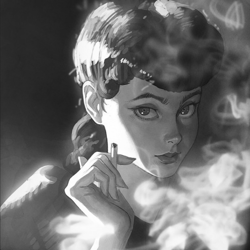

In [ ]:
img = Image.fromarray(grey)
img.resize((250,250)).show()

**Получение результатов:**

In [ ]:
get_result_table([vector_sol_5, non_vector_sol_5, custom_sol_5],\
                 [[rachel_1, coefs], [rachel_2, coefs], [rachel_3, coefs]], 3)

args_1        args_2        args_3
Vector_s       11129.767  2.199547e+04  4.510536e+04
Nonvector_s  5736891.585  1.967929e+07  4.621512e+07
Custom_s       17424.834  6.051204e+04  1.483502e+05

**Выводы:**  

Сложение всех цветов, умноженных на коэффициенты является наиболее эффективным. Применение той же операции с использованием функции dot по какой-то причине сильно замедляет выполнение операции. По всей видимости, это связано с большим числом проверок аргументов функции, проводимых внутри. 

Заполнение же массива, размером, равным изображению, цветами с нуля является наиболее медленным

---
### Задание 6
Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.
Пример: x = np.array([2, 2, 2, 3, 3, 3, 5]). Ответ: (np.array([2, 3, 5]), np.array([3, 3, 1])).

**Решение:**

In [ ]:
# Vectorized solution
# Not really vectorized
def vector_sol_6(x):
    unique = np.unique(x)
    num_of_un = np.array(list((len(np.where(x == val)[0]) for val in unique)))
    return (unique, num_of_un)

In [ ]:
# Nonvectorized solution
def non_vector_sol_6(x):
    unique = np.array([])
    num_of_unique = np.array([])
    
    for i, val in enumerate(x):
        if val not in unique:
            np.append(unique, val)
            np.append(num_of_unique, 1)
        else:
            ind = np.where(unique == val)
            num_of_unique[i] += 1
    
    return (unique, num_of_unique)        

In [ ]:
# Custom solution
def custom_sol_6(x):
    unique = np.unique(x)
    num_of_un = np.zeros(len(unique), dtype=np.uint32)
    for i, un in enumerate(unique):
        num_of_un[i] = list(x).count(un)
        
    return (unique, num_of_un)

**Инициализация тестовых данных:**

In [ ]:
c_1 = np.array([2, 2, 2, 3, 3, 3, 5])
c_2 = np.random.randint(-10, 10, 150)
c_3 = np.random.randint(-10, 10, 1000)

**Проверка работы функций:**

In [ ]:
vector_sol_6(c_1)
ret_2 = non_vector_sol_6(c_2)
ret_3 = custom_sol_6(c_3)

**Получение результатов:**

In [ ]:
get_result_table([vector_sol_6, non_vector_sol_6, custom_sol_6], [[c_1], [c_2], [c_3]], 1000)

args_1       args_2       args_3
Vector_s     58083.365    78185.707    73256.030
Nonvector_s  70618.315  1475355.285  9665790.951
Custom_s      9256.836   161130.098   984950.845

**Выводы:**  
Векторизованное (но не совсем) решение, представленное в первой реализации, является наиболее эффективным при больших размерах массива. Оно заключается в получение уникальных значений мультимножества и последующего пересчета размера необходимых масок, накладываемых на исходынй массив.

Прямой проход по всему массиву - самый медленный, а смешанное решение занимает промежуточное значение

---
### Задание 7
Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

**Решение:**

In [ ]:
# Vectorized solution
# Don't know how to implement vectorized variant on my own
# Let's just test the speed of the solution from scipy
def not_my_vector_sol_7(a, b):
    # FROM STACK OVERFLOW
    
    # It's the only solution that generalizes 
    # to an arbitary number of dimensions
    # But it doesn't work properly with big arrays
    # due to calculation error with floats (i suppose)
    
    P = np.add.outer(np.sum(a**2, axis=1), np.sum(b**2, axis=1))
    N = np.dot(a, b.T)
    
    if np.where((P - 2 * N) < 0):
        return
    
    return np.sqrt(P - 2*N)

In [ ]:
# Following solutions are implemented by myself
# Nonvectorized solution
def non_vector_sol_7(x, y):
    assert x.shape[1] == y.shape[1]
    result = np.zeros((len(x), len(y)))
    for i, val_x in enumerate(x):
        for j, val_y in enumerate(y):
            result[i, j] = np.sqrt(np.sum((val_y - val_x)**2))
            
    return result

In [ ]:
# Custom solution
def custom_sol_7(x, y):
    assert x.shape[1] == y.shape[1]
    result = np.zeros((len(x), len(y)))
    for ind in range(x.shape[1]):
        sub = np.subtract.outer(x[:, ind], y[:, ind])
        result += sub**2
        
    return np.sqrt(result)

**Инициализация тестовых данных:**

In [ ]:
e_1 = np.random.rand(4, 2)
e_2 = np.random.rand(100, 200)
e_3 = np.random.rand(1000, 500)

**Проверка работы функций:**

In [ ]:
assert((distance.cdist(e_1, e_1, 'euclidean').round(3) == not_my_vector_sol_7(e_1, e_1).round(3)).all())
assert((distance.cdist(e_2, e_2, 'euclidean').round(3) == non_vector_sol_7(e_2, e_2).round(3)).all())
assert((distance.cdist(e_3, e_3, 'euclidean').round(3) == custom_sol_7(e_3, e_3).round(3)).all())

**Получение результатов:**

In [ ]:
get_result_table([not_my_vector_sol_7, non_vector_sol_7, custom_sol_7, distance.cdist],\
                 [[e_1, e_1], [e_2, e_2], [e_3, e_3]], 10, ['scipy'])

args_1      args_2        args_3
Vector_s     167966.3   2808320.1  3.314292e+08
Nonvector_s  162951.6  98307253.6  6.614160e+09
Custom_s      10794.4   3212413.8  1.990018e+09
scipy          6321.9    604430.6  1.934054e+08

**Выводы:**  

Со скоростью реализации из библиотеки scipy удается сравниться лищь векторизованному варианту. Однако, учитывая неправильность значений, получаемых с его помощью (см. комментарии), можно исключить его из "соревнования".

Смешанное решение является в таком случае вторым по эффективности. Вложенные циклы, как и всегда, наименее эффективны.

---
### Общий вывод:

Таким образом задачу всегда можно решить с помощью множества различных способов. Использовании векторизованного варианта не всегда является опраданным:
   - оно не всегда самое быстрое;
   - сильно снижается читаемость, а как следствие, и удобство последующей поддержки кода.

Однако при больших массивах данных чаще всего следует все же использовать именно векторизованный вариант решения задачи. Более того, в таком случае, не приходится писать то, что уже написано, что особенно ценится программистами на python